In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Netflix Userbase.csv")

In [22]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [23]:
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [25]:
#Creating new column named month by extracting the month number from join date

In [26]:
df['Month'] = df['Join Date'].str[3:5]
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Month
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,01
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,09
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,02
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,07
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,05
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,07
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,08
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,08
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,08


In [27]:
#converting the Monthly Revenue and Plan Duration to numeric

In [28]:
df['Monthly Revenue'] = pd.to_numeric(df['Monthly Revenue'])
df['Plan Duration'] = pd.to_numeric(df['Plan Duration'].str[0:1])

In [29]:
#creating new column as Sales

In [30]:
df['Sales'] = df['Monthly Revenue']*df['Plan Duration']
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Month,Sales
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1,01,10
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1,09,15
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1,02,12
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1,07,12
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1,05,10


In [31]:
#calculating the total sales based on months

In [34]:
results = df.groupby('Month')['Sales'].sum().reset_index()
results

,Month,Sales
0,01,252
1,02,160
2,03,230
3,04,293
4,05,557
5,06,3733
6,07,6012
7,08,4731
8,09,4598
9,10,6604


In [ ]:
#Visualizing the sales based on the months

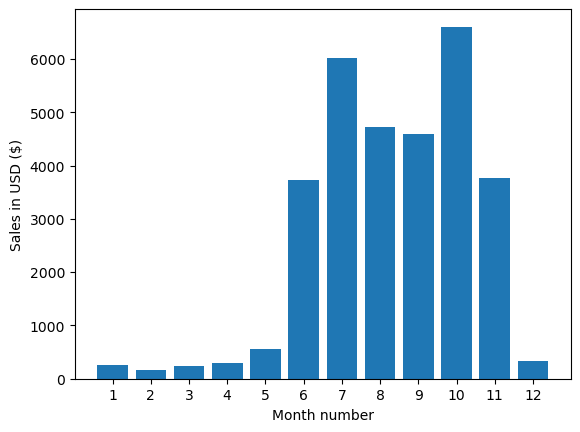

In [36]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [ ]:
#which country has highest number of sales

In [40]:
country_sales = df.groupby('Country')['Sales'].sum().reset_index()
country_sales

,Country,Sales
0,Australia,2271
1,Brazil,2285
2,Canada,3950
3,France,2307
4,Germany,2260
5,Italy,2317
6,Mexico,2237
7,Spain,5662
8,United Kingdom,2318
9,United States,5664


In [54]:
#Visualizing the sales based on Countries

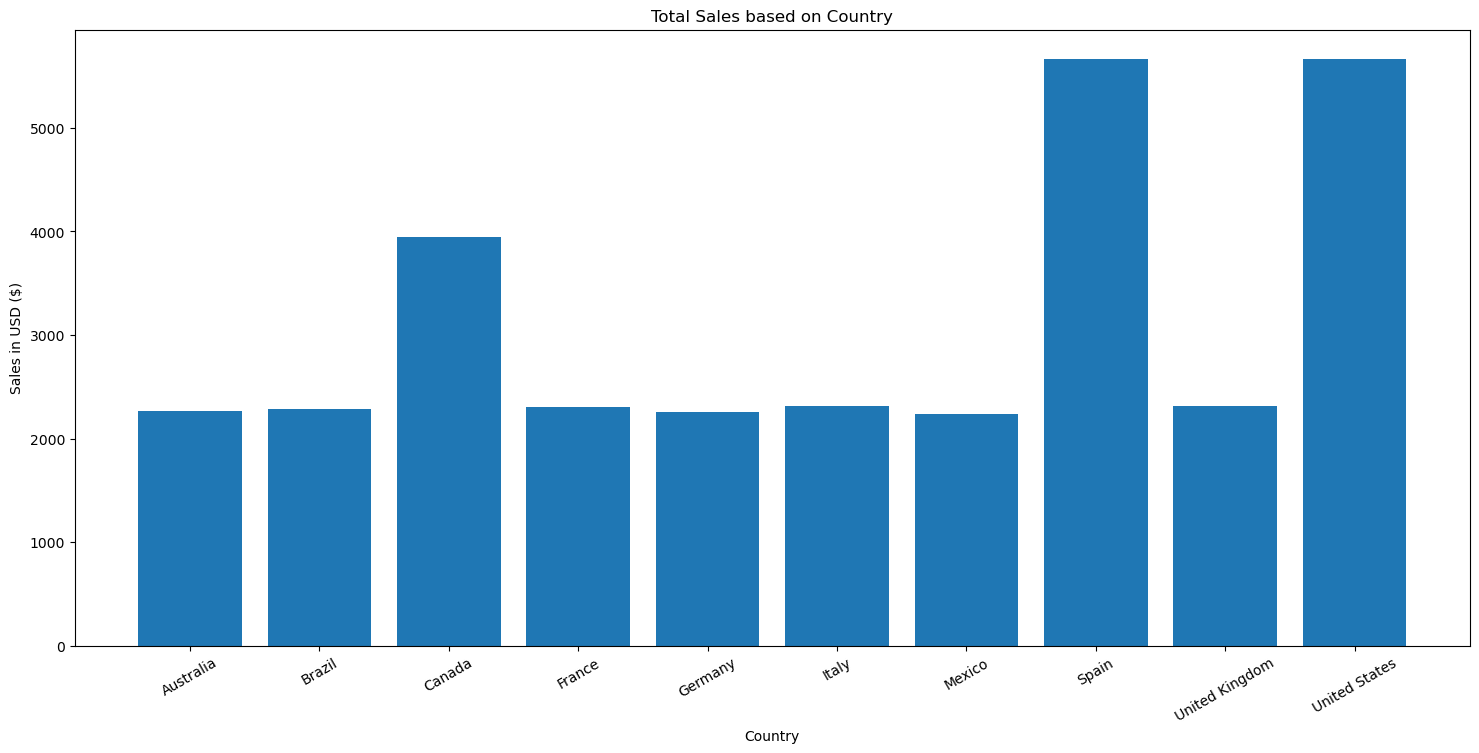

In [53]:
plt.figure(figsize=(18,8))
plt.bar(country_sales['Country'], country_sales['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Country')
plt.title('Total Sales based on Country')
plt.xticks(rotation=30)
plt.show()